In [3]:
import numpy as np
import cupy as cp
import ray
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy.math_module import xp
reload(cgi)

import misc_funs as misc

iwa = 6
owa = 20

data_dir = cgi.data_dir

# dm1_flat = 2*fits.getdata(data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm1.fits')
# dm2_flat = 2*fits.getdata(data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm2.fits')

# Test monochromatic PSFs.

0.1 0.0072010264910560605 arcsec / pix


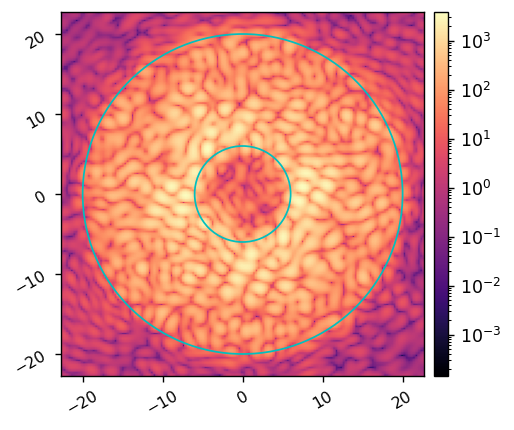

In [61]:
reload(cgi.cgi)
mode = cgi.cgi.CGI(cgi_mode='spc-wide', 
               npsf=150,
               use_pupil_defocus=True, 
               use_opds=True,
               source_flux=3.840e+08*u.ph/(u.s * u.m**2),
               )

# mode.Imax_ref = ref_unocc_im.max()
mode.use_fpm = True

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.imshow1(image, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

# if poppy.accel_math._USE_CUPY:
#     misc.save_fits(data_dir/'spc-wide_psf_gpu.fits', psf, header={'PIXELSCL':mode.psf_pixelscale_lamD})
# else:
#     misc.save_fits(data_dir/'spc-wide_psf_cpu.fits', psf, header={'PIXELSCL':mode.psf_pixelscale_lamD})

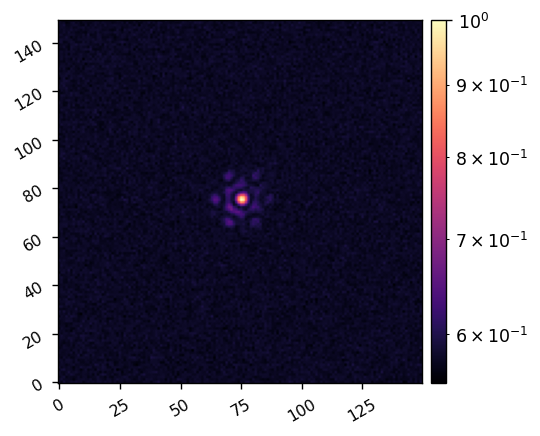

In [65]:
from emccd_detect import emccd_detect
meta_path = Path('/home/kianmilani/Projects/emccd_detect/emccd_detect/emccd_detect/util/metadata.yaml')

mode.use_fpm = False
mode.Imax_ref = None

exp_time = 0.002
em_gain = 1

full_well_image=60000.  # e-
full_well_serial=100000.  # e-
#status=1,
dark_current=0.0028  # e-/pix/s
cic=0.02  # e-/pix/frame
read_noise=100.  # e-/pix/frame
bias=10000.  # e-
qe=0.5
cr_rate=0.  # hits/cm^2/s
pixel_pitch=13e-6  # m
eperdn=1 #7.,
nbits=64#14,
numel_gain_register=604

emccd = emccd_detect.EMCCDDetect(em_gain=em_gain,
                                    full_well_image=full_well_image,  # e-
                                    full_well_serial=full_well_serial,  # e-
                                    #status=status,
                                    dark_current=dark_current,  # e-/pix/s
                                    cic=cic,  # e-/pix/frame
                                    read_noise=read_noise,  # e-/pix/frame
                                    bias=bias,  # e-
                                    qe=qe,
                                    cr_rate=cr_rate,  # hits/cm^2/s
                                    pixel_pitch=pixel_pitch,  # m
                                    eperdn=eperdn,
                                    nbits=nbits,
                                    numel_gain_register=numel_gain_register,
                                    meta_path=meta_path
                                    )

mode.emccd = emccd
mode.exp_time = exp_time
mode.exp_time_ref = exp_time
mode.gain_ref = em_gain
mode.Nframes = 1

frame = mode.snap()
misc.imshow1(frame/frame.max(), lognorm=True)



In [59]:
frame

array([[0.56323293, 0.57404001, 0.56921131, ..., 0.56984364, 0.57007358,
        0.57685675],
       [0.56673948, 0.58576684, 0.57271787, ..., 0.57156818, 0.57438492,
        0.57622442],
       [0.5777765 , 0.57501725, 0.57133824, ..., 0.57582203, 0.57122327,
        0.57375259],
       ...,
       [0.58093815, 0.57812141, 0.57697172, ..., 0.56231318, 0.57794895,
        0.57478731],
       [0.57582203, 0.58042079, 0.57656933, ..., 0.57231547, 0.57812141,
        0.57610945],
       [0.57162566, 0.57047597, 0.58151299, ..., 0.57076339, 0.57174063,
        0.57495976]])

In [49]:
frame/mode.Imax_ref

array([[0.57920074, 0.57989676, 0.57827272, ..., 0.58099878, 0.59161302,
        0.58111478],
       [0.5816368 , 0.58761093, 0.58395685, ..., 0.5819268 , 0.57421263,
        0.58314483],
       [0.58587089, 0.57647468, 0.58720492, ..., 0.58128879, 0.59468708,
        0.5862189 ],
       ...,
       [0.58308683, 0.58244881, 0.59207703, ..., 0.57983876, 0.58041877,
        0.58059277],
       [0.57856273, 0.58418885, 0.58291282, ..., 0.57902674, 0.58297083,
        0.58256482],
       [0.58529088, 0.5819848 , 0.57914274, ..., 0.5864509 , 0.5820428 ,
        0.56957253]])

In [ ]:
exp_time = 1
em_gain = 1

emccd = emccd_detect.EMCCDDetect(em_gain=em_gain,
                                    full_well_image=full_well_image,  # e-
                                    full_well_serial=full_well_serial,  # e-
                                    #status=status,
                                    dark_current=dark_current,  # e-/pix/s
                                    cic=cic,  # e-/pix/frame
                                    read_noise=read_noise,  # e-/pix/frame
                                    bias=bias,  # e-
                                    qe=qe,
                                    cr_rate=cr_rate,  # hits/cm^2/s
                                    pixel_pitch=pixel_pitch,  # m
                                    eperdn=eperdn,
                                    nbits=nbits,
                                    numel_gain_register=numel_gain_register,
                                    meta_path=meta_path
                                    )

mode.use_fpm = True
